In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_OF_SAMPLES = 10
x_arr = np.random.rand(NUM_OF_SAMPLES)
y_arr = np.random.rand(NUM_OF_SAMPLES)
idx = range(NUM_OF_SAMPLES)

In [3]:
df = pd.DataFrame(list(zip(x_arr, y_arr)), index=idx, columns=["x", "y"])
df.head()

,x,y
0,0.486054,0.256798
1,0.004312,0.848778
2,0.323368,0.132882
3,0.310644,0.025113
4,0.636896,0.948694


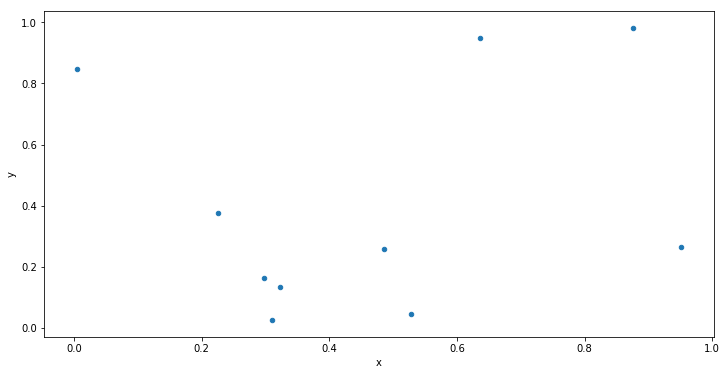

In [4]:
ax = df.plot.scatter(x="x", y="y", figsize=(12,6))
fig = ax.get_figure()
fig.savefig(r"c:\Dev\04.Python\06.Office_automation\Powerpoint_presentation\fig1.png")

In [5]:
import seaborn as sns
import sqlite3

In [6]:
conn = sqlite3.connect(r"c:\Dev\04.Python\06.Office_automation\Powerpoint_presentation\iris_db\iris.sqlite")
df2 = pd.read_sql_query("SELECT * FROM iris", conn)
df2.head()

,index,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


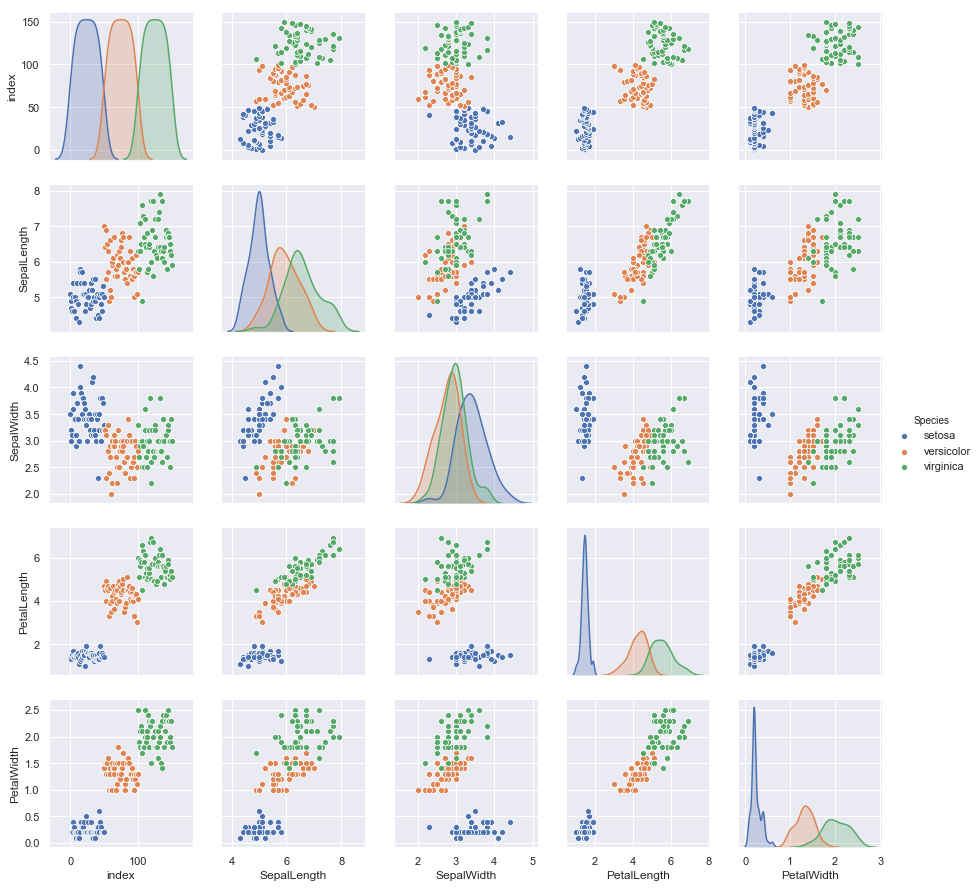

In [7]:
sns.set()
sns_plot = sns.pairplot(df2,  
                        hue="Species", height=2.5)
# sns_plot = sns.pairplot(df2, vars=["SepalWidth", "SepalLength"], 
#                         hue="Species", height=2.5)

In [8]:
#http://www.sqlitetutorial.net/sqlite-sample-database/

business_conn = sqlite3.connect(r"c:\Dev\04.Python\06.Office_automation\Powerpoint_presentation\sqlite_sample_db\chinook.db")
businessdf = pd.read_sql_query("""
    SELECT ArtistName, SUM(Quantity*UnitPrice) as TotalSales
    FROM (
        SELECT * from invoices
        LEFT JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
        LEFT JOIN tracks ON invoice_items.TrackId = tracks.TrackID
        LEFT JOIN albums ON albums.AlbumId = tracks.AlbumId
        LEFT JOIN (
            SELECT Name as ArtistName, ArtistId
            FROM artists
        ) as artists2
        ON artists2.ArtistId = albums.ArtistId
    )
    GROUP BY ArtistId
    ORDER BY TotalSales ASC
""", business_conn)
businessdf.head()



,ArtistName,TotalSales
0,Dread Zeppelin,0.99
1,Habib Koité and Bamada,0.99
2,The Posies,0.99
3,Luciana Souza/Romero Lubambo,0.99
4,English Concert & Trevor Pinnock,0.99


In [9]:
#SQL to get sorted list
# SELECT ArtistName, SUM(Quantity*UnitPrice) as TotalSales
# FROM (
#         SELECT * from invoices
#         LEFT JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
#         LEFT JOIN tracks ON invoice_items.TrackId = tracks.TrackID
#         LEFT JOIN albums ON albums.AlbumId = tracks.AlbumId
#         LEFT JOIN (
#             SELECT Name as ArtistName, ArtistId
#             FROM artists
#         ) as artists2
#         ON artists2.ArtistId = albums.ArtistId
#     )
# GROUP BY ArtistId
# ORDER BY TotalSales DESC
# LIMIT 20

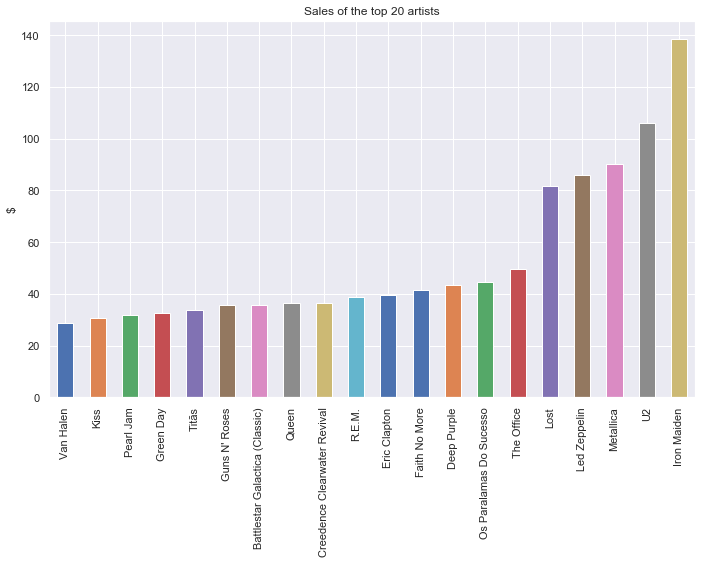

In [10]:
plt1 = businessdf.loc[businessdf.index > len(businessdf)-21].plot.bar(x="ArtistName", 
                                                               y="TotalSales",
                                                                figsize=(10, 8)    )
# ax = plt.gca()
plt1.set_ylabel("$")
plt1.set_xlabel("")
plt1.set_title("Sales of the top 20 artists")
plt1.legend().remove()
# plt.get_figure().subplots_adjust(bottom=0.75)
plt1.get_figure().tight_layout()
# plt1.get_figure().savefig(
#     r"c:\Dev\04.Python\06.Office_automation\Powerpoint_presentation\top20sales.png",
#     bbox_inches = "tight"
# )
# businessdf.plot.bar(x="ArtistName", y="TotalSales")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224CF48F5F8>]],
      dtype=object)

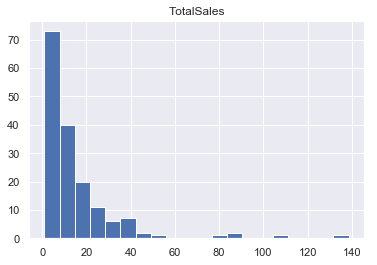

In [11]:
businessdf.hist(bins=20)

In [12]:
summarized_salesDF = pd.DataFrame(
    businessdf.loc[businessdf.index > len(businessdf)-21]
)
# summarized_salesDF.to_clipboard()
summarized_salesDF.head(30)


,ArtistName,TotalSales
145,Van Halen,28.71
146,Kiss,30.69
147,Pearl Jam,31.68
148,Green Day,32.67
149,Titãs,33.66
150,Guns N' Roses,35.64
151,Battlestar Galactica (Classic),35.82
152,Queen,36.63
153,Creedence Clearwater Revival,36.63
154,R.E.M.,38.61


In [13]:
businessdf.loc[businessdf.index <= len(businessdf)-21].sum()[1]

1266.4800000000002

In [14]:
summarized_salesDF = summarized_salesDF.append({"ArtistName": "Other (with sales below first 20)", 
                   "TotalSales": (businessdf.loc[businessdf.index <= len(businessdf)-21].sum()[1])},
                 ignore_index=True)

summarized_salesDF.index = summarized_salesDF.ArtistName
summarized_salesDF.head(35)

,ArtistName,TotalSales
ArtistName,,
Van Halen,Van Halen,28.71
Kiss,Kiss,30.69
Pearl Jam,Pearl Jam,31.68
Green Day,Green Day,32.67
Titãs,Titãs,33.66
Guns N' Roses,Guns N' Roses,35.64
Battlestar Galactica (Classic),Battlestar Galactica (Classic),35.82
Queen,Queen,36.63
Creedence Clearwater Revival,Creedence Clearwater Revival,36.63


Text(0,0.5,'')

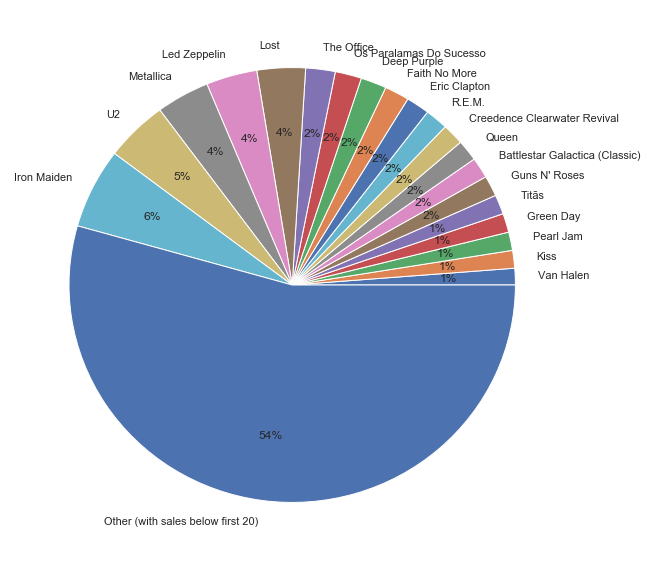

In [15]:
ax = summarized_salesDF.plot.pie("TotalSales", autopct='%1.0f%%', pctdistance=0.7, figsize=(10,10))
ax.legend().remove()
ax.set_ylabel("")

In [16]:
sales_by_dateDF = pd.read_sql_query("""
    SELECT strftime('%Y-%m', datetime(InvoiceDate)) as year, SUM(Total) as MonthlySales
    FROM (
        SELECT * from invoices
    )
    GROUP BY strftime('%Y-%m', datetime(InvoiceDate))
    ORDER BY strftime('%Y-%m', datetime(InvoiceDate)) ASC
""", business_conn, parse_dates = ["year"])
sales_by_dateDF.head(20)

,year,MonthlySales
0,2009-01-01,35.64
1,2009-02-01,37.62
2,2009-03-01,37.62
3,2009-04-01,37.62
4,2009-05-01,37.62
5,2009-06-01,37.62
6,2009-07-01,37.62
7,2009-08-01,37.62
8,2009-09-01,37.62
9,2009-10-01,37.62


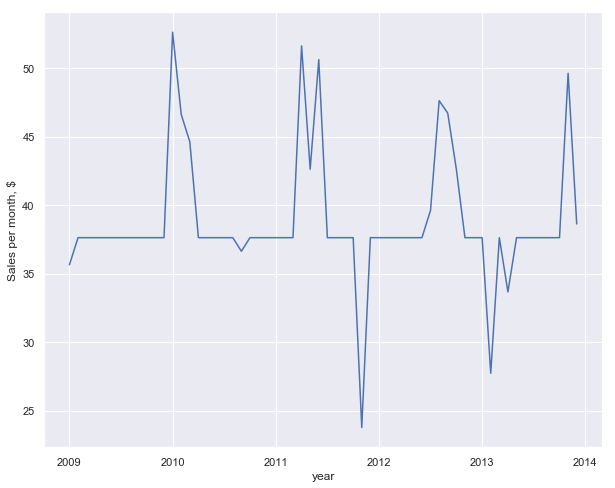

In [20]:
plt1 = sales_by_dateDF.plot(x="year", y="MonthlySales", figsize=(10,8))
plt1.set_ylabel("Sales per month, $")
plt1.legend().remove()

In [35]:
employeesDF = pd.read_sql_query("""
        SELECT EmployeeId, FirstName, employeeLastName as LastName, CAST((SUM(CAST((UnitPrice*100) AS INT)*Quantity)) AS FLOAT)/100 as TotalSales
        FROM (
            SELECT * from invoice_items
            LEFT JOIN  invoices ON invoices.InvoiceId = invoice_items.InvoiceId
            LEFT JOIN tracks ON invoice_items.TrackId = tracks.TrackID
            LEFT JOIN albums ON albums.AlbumId = tracks.AlbumId
            LEFT JOIN (
                SELECT Name as ArtistName, ArtistId
                FROM artists
            ) as artists2 ON artists2.ArtistId = albums.ArtistId
            LEFT JOIN customers ON customers.CustomerId = invoices.CustomerId
            LEFT JOIN (
                SELECT FirstName, LastName as employeeLastName, EmployeeId FROM employees
            ) as employees2 ON customers.SupportRepId = employees2.EmployeeId
        )
        GROUP BY EmployeeId
        """, business_conn)
employeesDF.to_clipboard()
employeesDF.head()

,EmployeeId,FirstName,LastName,TotalSales
0,3,Manoj,Peacock,833.04
1,4,Madalena,Park,775.40
2,5,Victor,Johnson,720.16


In [30]:
employeeDF_dict = employeesDF.to_dict(orient="index")
[employeeDF_dict[x] for x in employeeDF_dict]

[{'EmployeeId': 3,
  'FirstName': 'Manoj',
  'LastName': 'Peacock',
  'TotalSales': 833.04},
 {'EmployeeId': 4,
  'FirstName': 'Madalena',
  'LastName': 'Park',
  'TotalSales': 775.4},
 {'EmployeeId': 5,
  'FirstName': 'Victor',
  'LastName': 'Johnson',
  'TotalSales': 720.16}]

In [48]:
employeesSalesDF = pd.read_sql_query("""
        SELECT EmployeeId, fn as FirstName, ln as LastName, 
            strftime('%Y-%m', datetime(InvoiceDate)) as SalesMonth, 
            SUM(Total) as EmployeeTotalSales
            FROM invoices 
            LEFT JOIN customers ON customers.CustomerId = invoices.CustomerId
            LEFT JOIN (
                SELECT FirstName as fn, LastName as ln, EmployeeId FROM employees
            ) as employees2 ON customers.SupportRepId = employees2.EmployeeId
        WHERE EmployeeID = 3
        GROUP BY strftime('%Y-%m', datetime(InvoiceDate))
        ORDER BY strftime('%Y-%m', datetime(InvoiceDate))
        """, 
        business_conn, parse_dates=["SalesMonth"])
employeesSalesDF.head()

,EmployeeId,FirstName,LastName,SalesMonth,EmployeeTotalSales
0,3,Jane,Peacock,2009-01-01,0.99
1,3,Jane,Peacock,2009-02-01,20.79
2,3,Jane,Peacock,2009-03-01,1.98
3,3,Jane,Peacock,2009-04-01,18.81
4,3,Jane,Peacock,2009-05-01,10.89


In [53]:
employee_calculated_sales = pd.DataFrame(employeesSalesDF.merge(sales_by_dateDF, left_on="SalesMonth", right_on="year"))
employee_calculated_sales.head()

,EmployeeId,FirstName,LastName,SalesMonth,EmployeeTotalSales,year,MonthlySales
0,3,Jane,Peacock,2009-01-01,0.99,2009-01-01,35.64
1,3,Jane,Peacock,2009-02-01,20.79,2009-02-01,37.62
2,3,Jane,Peacock,2009-03-01,1.98,2009-03-01,37.62
3,3,Jane,Peacock,2009-04-01,18.81,2009-04-01,37.62
4,3,Jane,Peacock,2009-05-01,10.89,2009-05-01,37.62


In [57]:
employee_calculated_sales["proporsionOfTotal"] = employee_calculated_sales["EmployeeTotalSales"] / employee_calculated_sales["MonthlySales"]
employee_calculated_sales.head()

,EmployeeId,FirstName,LastName,SalesMonth,EmployeeTotalSales,year,MonthlySales,proporsionOfTotal
0,3,Jane,Peacock,2009-01-01,0.99,2009-01-01,35.64,0.027778
1,3,Jane,Peacock,2009-02-01,20.79,2009-02-01,37.62,0.552632
2,3,Jane,Peacock,2009-03-01,1.98,2009-03-01,37.62,0.052632
3,3,Jane,Peacock,2009-04-01,18.81,2009-04-01,37.62,0.500000
4,3,Jane,Peacock,2009-05-01,10.89,2009-05-01,37.62,0.289474


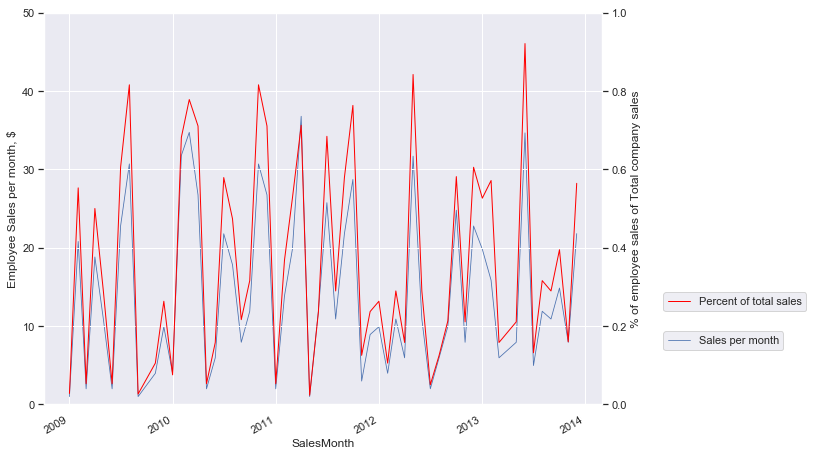

In [120]:
plt1 = employee_calculated_sales.plot(x="SalesMonth", y=["EmployeeTotalSales"], figsize=(10,8), lw=0.8)
plt1.set_ylim(0,50)
plt1.set_ylabel("Employee Sales per month, $")
plt1.legend(["Sales per month"], bbox_to_anchor=(1.1, 0.2))

ax2 = plt1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
ax2 = employee_calculated_sales.plot(ax = ax2, x="SalesMonth", y=["proporsionOfTotal"], color="red", lw=1.0)
ax2.set_ylim(0, 1.0)
ax2.set_ylabel("% of employee sales of Total company sales")
ax2.legend(["Percent of total sales"], bbox_to_anchor=(1.1, 0.3))
